In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.display import display as ipdisplay
from IPython.display import Audio
import librosa.display
import librosa
import soundfile as psf

sys.path.append('..')
from src import analysis, synthesis, display

%matplotlib inline

# Homework 1
<div class="alert alert-block alert-success">

* The questions in this notebook correspond to the questions in `../problems.md`
* Do not respond in this notebook. Instead, please respond in a separate document, saved as a `.pdf` and uploaded to canvas.
* Some questions will ask you to save the plot to `../outputs`. Please make sure to check these files in and push to Github.

</div>

## Part 1

<div class="alert alert-block alert-success">
    
1. Use your `generate_complex_tone` function to create a tone at 150 Hz with 4 odd harmonics
1. Listen to it
1. Plot the waveform 
1. Plot the spectrum
1. Answer the questions below
    
</div>

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


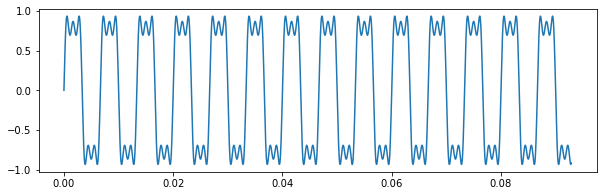

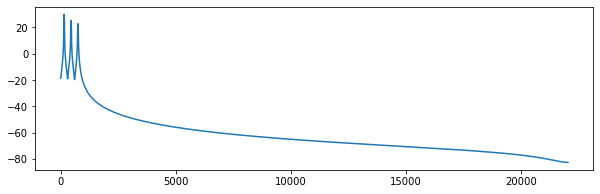

In [2]:
freq = 150
sample_rate = 44100
num_harmonics = 4
duration_s = 1
samples_display = 4096
partial_defs = [[(2*i-1), 1/(2*i-1), 0] for i in range(1, num_harmonics)]

x_1s = synthesis.generate_complex_tone(freq, partial_defs, duration_s, sample_rate)
x = x_1s[:samples_display]
X = analysis.dft(x * np.hanning(x.shape[0]))

ipdisplay(Audio(x_1s, rate=sample_rate))

plt.figure(figsize=(10,3))
display.plot_waveform(x, sample_rate)

plt.figure(figsize=(10,3))
display.plot_spectrum(X, sample_rate)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


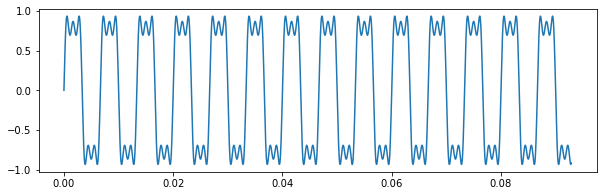

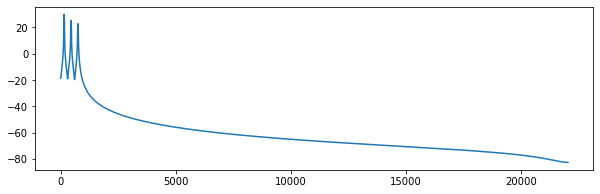

In [3]:
x_1s = synthesis.generate_complex_tone(freq, partial_defs, duration_s, sample_rate)
x = x_1s[:samples_display]
X = analysis.dft(x * np.hanning(x.shape[0]))

ipdisplay(Audio(x_1s, rate=sample_rate))

plt.figure(figsize=(10,3))
display.plot_waveform(x, sample_rate)

plt.figure(figsize=(10,3))
display.plot_spectrum(X, sample_rate)

<div class="alert alert-block alert-success">
    
**1A. Describe the shape of the waveform and spectrogram.**

</div>

<div class="alert alert-block alert-success">

Now, let's increase the number of harmonics to 100
    
</div>

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


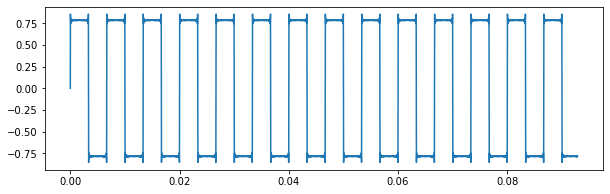

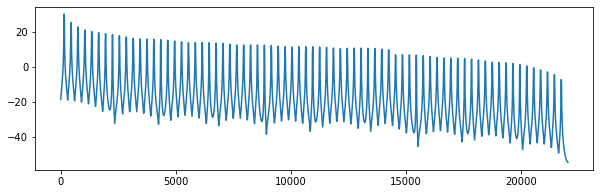

In [4]:
freq = 150
sample_rate = 44100
num_harmonics = 100
duration_s = 1
samples_display = 4096
partial_defs = [[(2*i-1), 1/(2*i-1), 0] for i in range(1, num_harmonics)]

x_1s = synthesis.generate_complex_tone(freq, partial_defs, duration_s, sample_rate)
x = x_1s[:samples_display]
X = analysis.dft(x * np.hanning(x.shape[0]))

ipdisplay(Audio(x_1s, rate=sample_rate))

plt.figure(figsize=(10,3))
display.plot_waveform(x, sample_rate)

plt.figure(figsize=(10,3))
display.plot_spectrum(X, sample_rate)

<div class="alert alert-block alert-success">
    
**1B. Describe the shape of the waveform and spectrogram in comparison to the previous example (1A) .**

**1C. Describe the sound of synthesized output in comparison to the previous example (1A).**
    
**1D. Explain why this example sounds different than the previous example (1A)**
    
</div>

<div class="alert alert-block alert-success">

Now, let's add a small random offset to all partial coefficients after the first one.
    
</div>

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


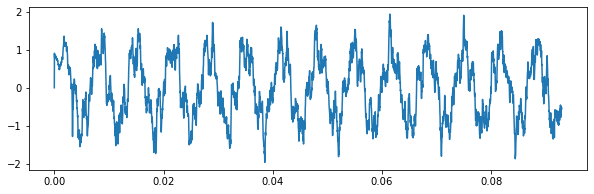

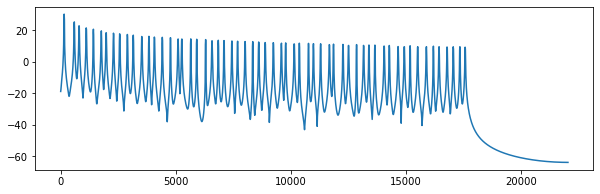

In [5]:
freq = 150
sample_rate = 44100
num_harmonics = 60
duration_s = 1
samples_display = 4096
partial_defs = [[(2*i-1) + np.random.random() * (i != 1), 1/(2*i-1), 0] for i in range(1, num_harmonics)]

x_1s = synthesis.generate_complex_tone(freq, partial_defs, duration_s, sample_rate)
x = x_1s[:samples_display]
X = analysis.dft(x * np.hanning(x.shape[0]))

ipdisplay(Audio(x_1s, rate=sample_rate))

plt.figure(figsize=(10,3))
display.plot_waveform(x, sample_rate)

plt.figure(figsize=(10,3))
display.plot_spectrum(X, sample_rate)

<div class="alert alert-block alert-success">
    
**1E. Describe the shape of the waveform and spectrogram in comparison to the previous example (1B-D) .**

**1F. Describe the sound of synthesized output in comparison to the previous example (1B-D).**
    
**1G. Explain why this example sounds different than the previous example (1B-D)**
    
</div>


## Part 2

<div class="alert alert-block alert-success">

The DFT (and IDFT) are linear functions. This means they satisfy the properties of *additivity* and *homegeneity*, and thus:

$$
DFT(c_1\cdot x_1 + c_2\cdot x+2) = c_1\cdot DFT(x_1) + c_2\cdot DFT(x_2)
$$

We show an example of this in the cell below.

**2A. Working from the DFT equation show that this statement is true.**
    
</div>

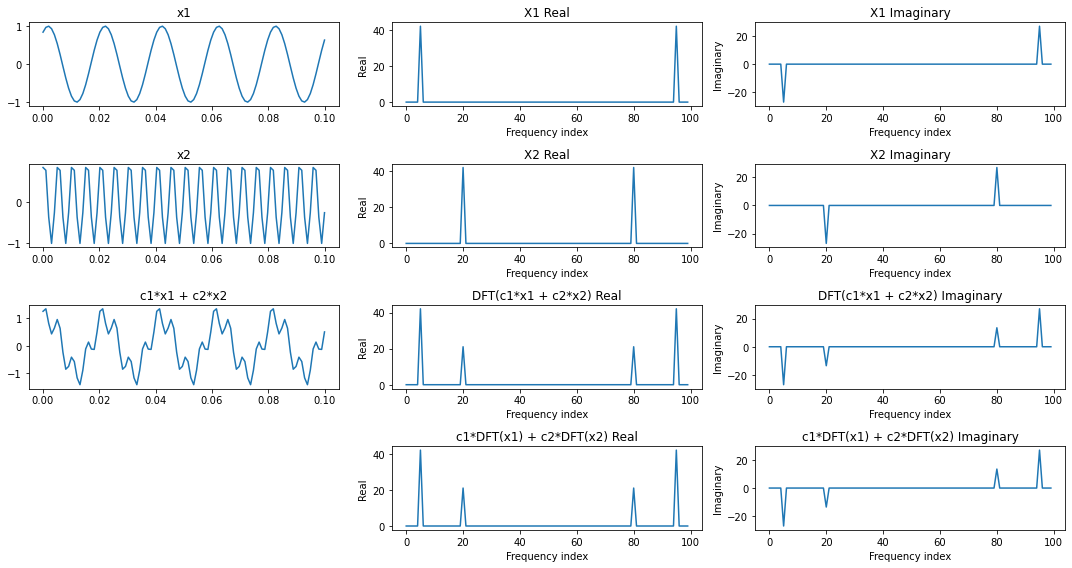

In [6]:
freq1 = 50
freq2 = 200
sample_rate = 1000
duration = 0.1

c1 = 1.0
c2 = 0.5

x1 = synthesis.generate_complex_tone(freq1, [[1,1,1]], duration, sample_rate)
x2 = synthesis.generate_complex_tone(freq2, [[1,1,1]], duration, sample_rate)

X1 = analysis.dft(x1)
X2 = analysis.dft(x2)

x = c1*x1 + c2*x2
X_left = analysis.dft(x)

X_right = c1 * X1 + c2 * X2

# plot x1
fig = plt.figure(figsize=(15,8))
plt.subplot(4,3,1)
display.plot_waveform(x1, sample_rate)
plt.title('x1')
plt.subplot(4,3,2)
plt.plot(np.real(X1))
plt.title('X1 Real')
plt.ylabel('Real')
plt.xlabel('Frequency index')
plt.subplot(4,3,3)
plt.plot(np.imag(X1))
plt.title('X1 Imaginary')
plt.ylabel('Imaginary')
plt.xlabel('Frequency index')

# plot x2
plt.subplot(4,3,4)
display.plot_waveform(x2, sample_rate)
plt.title('x2')
plt.subplot(4,3,5)
plt.plot(np.real(X2))
plt.title('X2 Real')
plt.ylabel('Real')
plt.xlabel('Frequency index')
plt.subplot(4,3,6)
plt.plot(np.imag(X2))
plt.title('X2 Imaginary')
plt.ylabel('Imaginary')
plt.xlabel('Frequency index')

# plot x
plt.subplot(4,3,7)
display.plot_waveform(x, sample_rate)
plt.title('c1*x1 + c2*x2')
plt.subplot(4,3,8)
plt.plot(np.real(X_left))
plt.title('DFT(c1*x1 + c2*x2) Real')
plt.ylabel('Real')
plt.xlabel('Frequency index')
plt.subplot(4,3,9)
plt.plot(np.imag(X_left))
plt.title('DFT(c1*x1 + c2*x2) Imaginary')
plt.ylabel('Imaginary')
plt.xlabel('Frequency index')

plt.subplot(4,3,11)
plt.plot(np.real(X_right))
plt.title('c1*DFT(x1) + c2*DFT(x2) Real')
plt.ylabel('Real')
plt.xlabel('Frequency index')
plt.subplot(4,3,12)
plt.plot(np.imag(X_right))
plt.title('c1*DFT(x1) + c2*DFT(x2) Imaginary')
plt.ylabel('Imaginary')
plt.xlabel('Frequency index')

plt.tight_layout()
plt.show()



<div class="alert alert-block alert-success">

An impulse is a signal in which:
$$
x[n]=
\begin{cases}
1, & \text{for } n=0\\
0, & \text{for } n\neq 0\\
\end{cases}
$$

The magnitude spectrum of an impulse is constant for all DFT frequencies. 

We show an example of this in th cell below.

**2B. Working from the equation for the DFT, show that the magnitude spectrum of an impulse is a constant for all DFT frequencies.**
    
</div>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


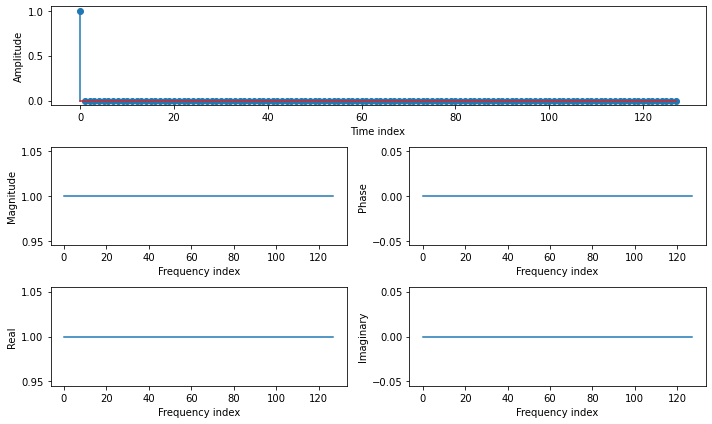

In [7]:
sample_rate = 44100
samples = 128

x = np.zeros(samples)
x[0] = 1
X = analysis.dft(x)

fig = plt.figure(figsize=(10,6))
spec = fig.add_gridspec(3,2)
fig.add_subplot(spec[0,:])
plt.stem(x)
plt.ylabel('Amplitude')
plt.xlabel('Time index')

fig.add_subplot(spec[1,0])
plt.plot(np.abs(X))
plt.ylabel('Magnitude')
plt.xlabel('Frequency index')

fig.add_subplot(spec[1,1])
plt.plot(np.angle(X))
plt.ylabel('Phase')
plt.xlabel('Frequency index')

fig.add_subplot(spec[2,0])
plt.plot(np.real(X))
plt.ylabel('Real')
plt.xlabel('Frequency index')

fig.add_subplot(spec[2, 1])
plt.plot(np.imag(X))
plt.ylabel('Imaginary')
plt.xlabel('Frequency index')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

When we delay an impulse, the magnitude stays the same, but the phase changes.
    
</div>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


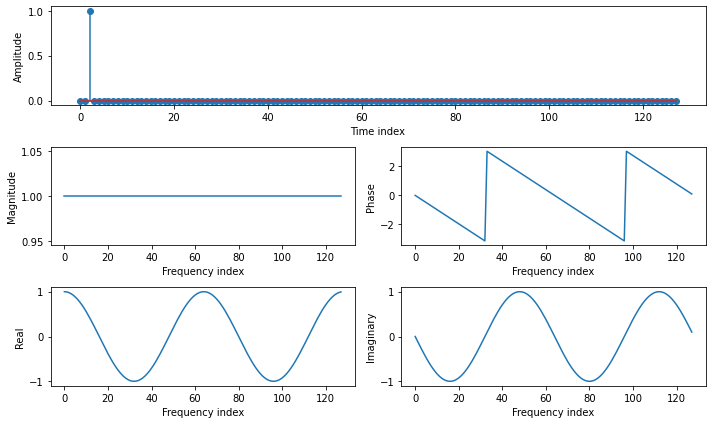

In [8]:
x = np.roll(x, 2) # delay by 2 samples
X = analysis.dft(x)

fig = plt.figure(figsize=(10,6))
spec = fig.add_gridspec(3,2)
fig.add_subplot(spec[0,:])
plt.stem(x)
plt.ylabel('Amplitude')
plt.xlabel('Time index')

fig.add_subplot(spec[1,0])
plt.plot(np.abs(X))
plt.ylabel('Magnitude')
plt.xlabel('Frequency index')

fig.add_subplot(spec[1,1])
plt.plot(np.angle(X))
plt.ylabel('Phase')
plt.xlabel('Frequency index')

fig.add_subplot(spec[2,0])
plt.plot(np.real(X))
plt.ylabel('Real')
plt.xlabel('Frequency index')

fig.add_subplot(spec[2, 1])
plt.plot(np.imag(X))
plt.ylabel('Imaginary')
plt.xlabel('Frequency index')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

...delayed even more
    
</div>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


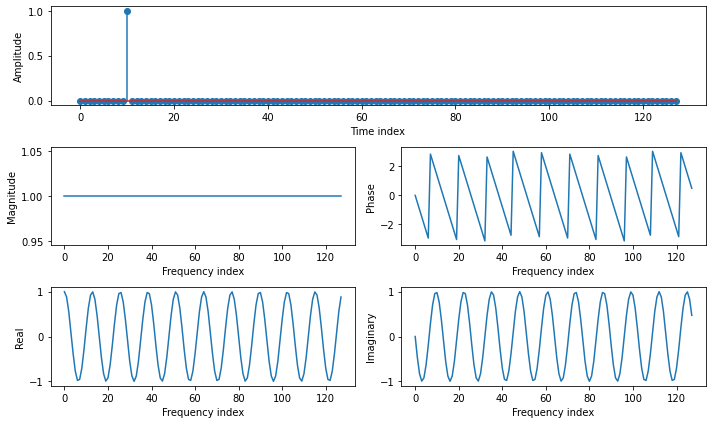

In [9]:
x = np.roll(x, 8) # delay by 8 samples
X = analysis.dft(x)

fig = plt.figure(figsize=(10,6))
spec = fig.add_gridspec(3,2)
fig.add_subplot(spec[0,:])
plt.stem(x)
plt.ylabel('Amplitude')
plt.xlabel('Time index')

fig.add_subplot(spec[1,0])
plt.plot(np.abs(X))
plt.ylabel('Magnitude')
plt.xlabel('Frequency index')

fig.add_subplot(spec[1,1])
plt.plot(np.angle(X))
plt.ylabel('Phase')
plt.xlabel('Frequency index')

fig.add_subplot(spec[2,0])
plt.plot(np.real(X))
plt.ylabel('Real')
plt.xlabel('Frequency index')

fig.add_subplot(spec[2, 1])
plt.plot(np.imag(X))
plt.ylabel('Imaginary')
plt.xlabel('Frequency index')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

**2C. Work from the DFT equation to explain what is going when we delay and impulse by `d` samples.**
    
</div>

## Question 3

<div class="alert alert-block alert-success">
    
Now, let's generate a sequence of tones in a C-major scale at a sampling rate of 48000 Hz.
    
</div>

In [10]:
major_scale = np.array([0, 2, 4, 5, 7, 9, 11]) # Major scale intervals
octaves = 6
starting_note = 48 # The MIDI note number for C3
pitches = np.hstack([major_scale + starting_note + i * 12 for i in range(octaves)])

durations = np.ones_like(pitches)
durations[(np.arange(durations.shape[0]) % 7) == 0] = 2

amplitudes = np.ones_like(pitches) * 0.5
amplitudes[(np.arange(amplitudes.shape[0]) % 7) == 0] = 1

note_sequence = np.hstack([pitches[:,np.newaxis], 
                           amplitudes[:,np.newaxis], 
                           durations[:,np.newaxis]])

partials = [[1,1,0], [2,0.5,0], [3, 0.5, 0]]
tempo = 240 # beats per minute
attack = 0.05 # seconds
decay = 0.15 # seconds

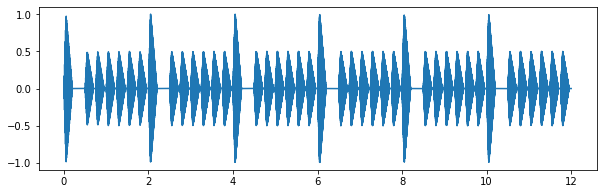

In [11]:
sample_rate = 48000
x = synthesis.sequence_notes(note_sequence, tempo, partials, attack, decay, sample_rate)

ipdisplay(Audio(x, rate=sample_rate))

plt.figure(figsize=(10,3))
display.plot_waveform(x, sample_rate)

<div class="alert alert-block alert-success">

Now, let's lower the sampling rate from 48000 to 11025 Hz.
    
</div>

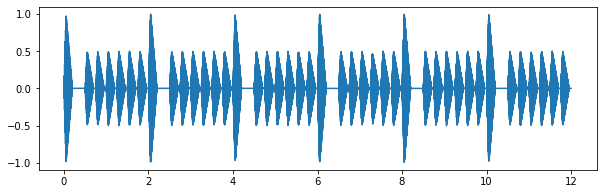

In [12]:
sample_rate_11khz = 11025
x_11khz = synthesis.sequence_notes(note_sequence, tempo, partials, attack, decay, sample_rate_11khz)

ipdisplay(Audio(x_11khz , rate=sample_rate_11khz))

plt.figure(figsize=(10,3))
display.plot_waveform(x_11khz , sample_rate_11khz)

<div class="alert alert-block alert-success">

**3A. What's going on? Why does it sound different?**
    
</div>

<div class="alert alert-block alert-success">

Now, let's plot the spectrogram of the 48000 Hz version using librosa.stft.
    
</div>

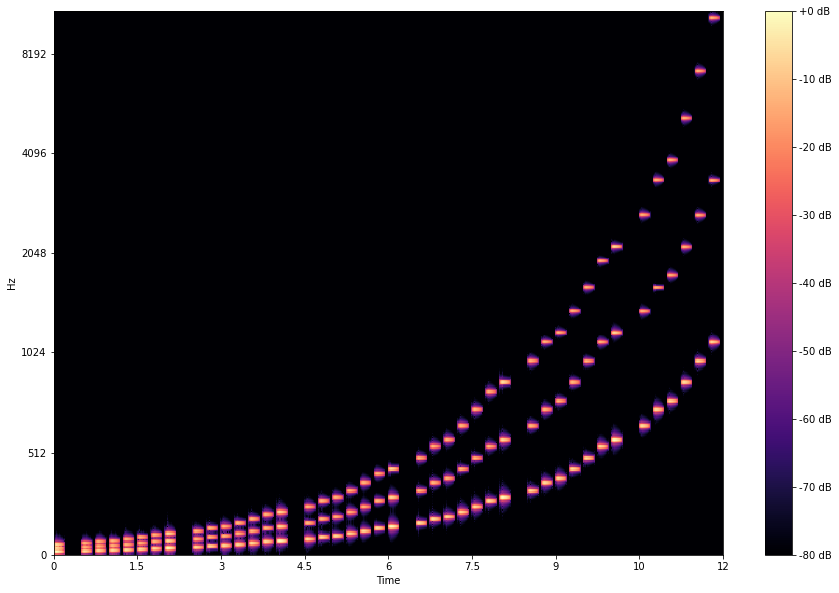

In [13]:
n_fft=1024
hop_length=256
win_length=1024
window='hann'
y_axis='mel'

D = librosa.amplitude_to_db(np.abs(librosa.stft(x, n_fft, hop_length, win_length, window)), ref=np.max)

plt.figure(figsize=(15,10))
librosa.display.specshow(D, y_axis=y_axis, sr=sample_rate, hop_length=hop_length, x_axis='time')
plt.colorbar(format="%+2.f dB")

plt.savefig('../outputs/c_major_scale_spectrogram.pdf')


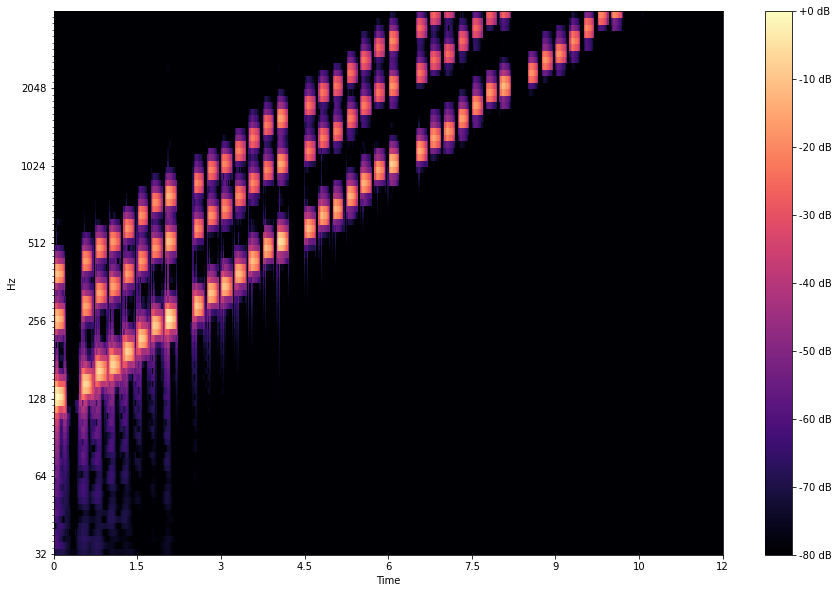

In [36]:
n_fft=4096
hop_length=1024
win_length=4096
window='hann'
y_axis='cqt_hz'

D = librosa.amplitude_to_db(np.abs(librosa.cqt(x, sr=sample_rate, hop_length=hop_length, window=window)), ref=np.max)

plt.figure(figsize=(15,10))
librosa.display.specshow(D, y_axis=y_axis, sr=sample_rate, hop_length=hop_length, x_axis='time')
plt.colorbar(format="%+2.f dB")

plt.savefig('../outputs/c_major_scale_spectrogram_2.pdf')


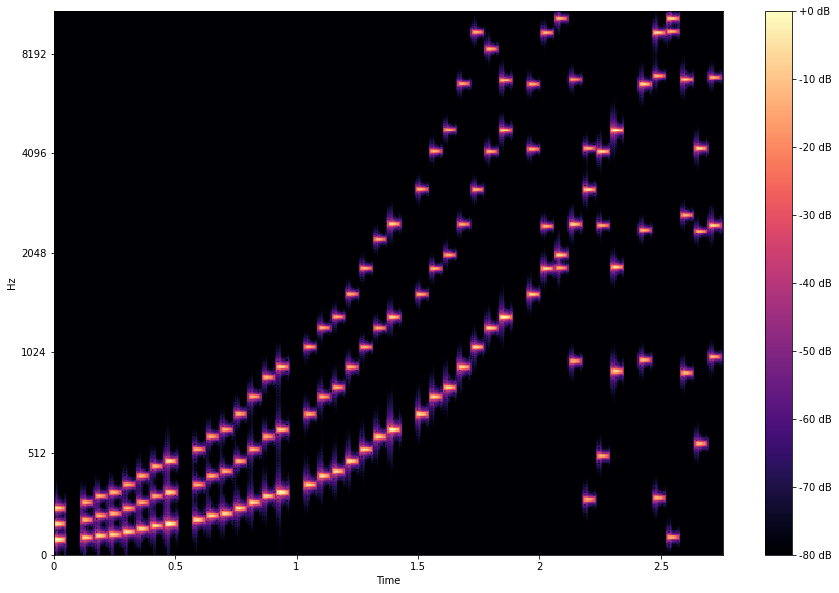

In [37]:
n_fft=1024
hop_length=256
win_length=1024
window='hann'
y_axis='mel'

D = librosa.amplitude_to_db(np.abs(librosa.stft(x_11khz, n_fft, hop_length, win_length, window)), ref=np.max)

plt.figure(figsize=(15,10))
librosa.display.specshow(D, y_axis=y_axis, sr=sample_rate, hop_length=hop_length, x_axis='time')
plt.colorbar(format="%+2.f dB")

plt.savefig('../outputs/c_major_scale_spectrogram_11khz.pdf')


<div class="alert alert-block alert-success">

Unfortunately, this isn't the best view of what's really going on. So, you need to fix it.

1. Read the documentation of `librosa.stft` and `librosa.specshow`
1. Manipulate the parameters `n_fft`, `hop_length`, `win_length`, `window`, and `y_axis` to improve the visual representation of this C-major scale of 3-harmonic complex tones. 
    
**3B. Save the output to `../outputs/c_major_scale_spectrogram.pdf`. Provide the parameters you used, and explain why each parameter was chosen.**
    
</div>

<div class="alert alert-block alert-success">

1. Read about other time-frequency representations implemented in `librosa`: https://librosa.org/doc/0.8.0/core.html#spectral-representations and https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html
1. Choose another representation that you think may be appropriate, and plot with specshow appropriately.
1. Tweak the parameters
    
    
**3C. Save the output to `../outputs/c_major_scale_spectrogram_2.pdf`. Provide the functions and parameters you used, and explain why each function and parameter was chosen.**
    
</div>

<div class="alert alert-block alert-success">

**3D. With your favorite spectral visualization you've found so far, go back and plot `x_11khz` again. Save the output to `../outputs/c_major_scale_spectrogram_11khz.pdf`. Describe what you see visually.**
    
</div>

<div class="alert alert-block alert-success">

`../data/04_002110.wav` is an audio file of an New York street. Using the same exploratory process you used in the last few examples, visualize the time-frequency content of the signal using a spectrogram or variant. 


**3E. Save the output to `../outputs/urban_soundscape_spectrogram.pdf`. Provide the functions and parameters you used, and explain why each function and parameter was chosen**
    
</div>


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


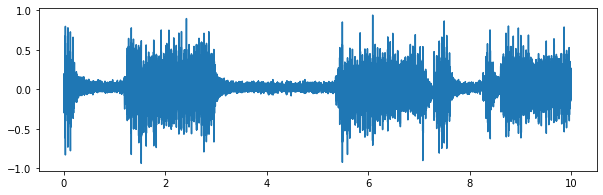

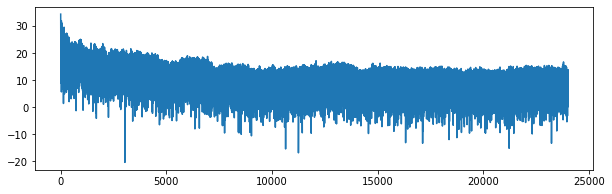

In [38]:
x_NY, sample_rate_NY = psf.read('../data/04_002110.wav')

Audio(x_NY, rate=sample_rate_NY)

X_NY = np.fft.fft(x_NY * np.hanning(x_NY.shape[0]))

plt.figure(figsize=(10,3))
display.plot_waveform(x_NY, sample_rate_NY)

plt.figure(figsize=(10,3))
display.plot_spectrum(X_NY, sample_rate_NY)


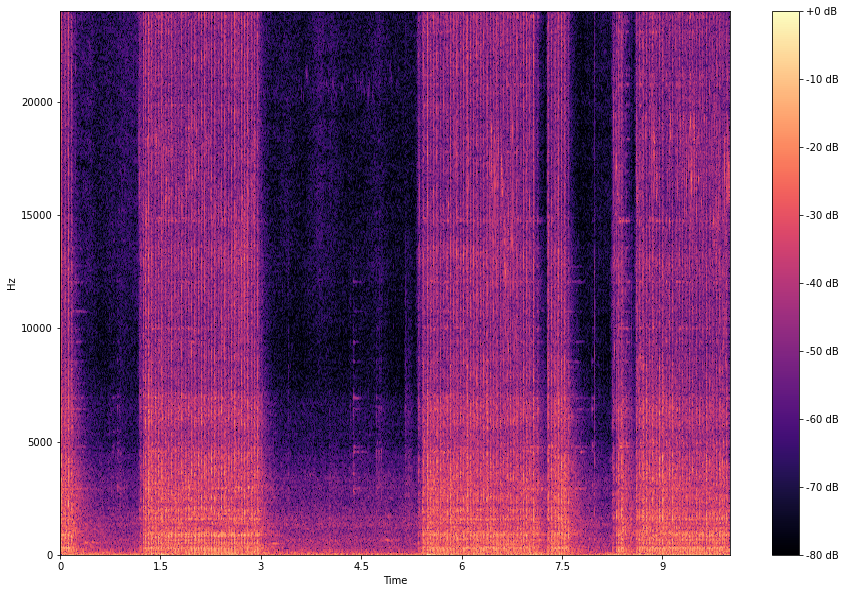

In [48]:
n_fft=1024
hop_length=256
win_length=1024
window='hann'
y_axis='hz'

f = librosa.stft(x_NY, n_fft, hop_length, win_length, window)
#f = librosa.cqt(x_NY, sr=sample_rate_NY, hop_length=hop_length, window=window)

D = librosa.amplitude_to_db(np.abs(f), ref=np.max)

plt.figure(figsize=(15,10))
librosa.display.specshow(D, y_axis=y_axis, sr=sample_rate_NY, hop_length=hop_length, x_axis='time')
plt.colorbar(format="%+2.f dB")

plt.savefig('../outputs/urban_soundscape_spectrogram.pdf')